<a href="https://colab.research.google.com/github/andrewlee-29/Applied_Deep_Learning_2023Summer/blob/main/Week5_hw2(muti_class%2Csingle_label)_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

d = 5000

#images of fashion items

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-d], y_train_full[:-d]
X_valid, y_valid = X_train_full[-d:], y_train_full[-d:]

print(X_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
(55000, 28, 28)


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(len(class_names))

for i in range(5):
  print(class_names[y_train[i]])

10
Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top


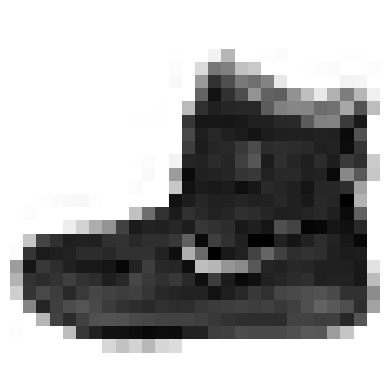

Ankle boot


In [ ]:
import matplotlib.pyplot as plt

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

i = 0 #try different values here!
plt.imshow(X_train[i], cmap="binary")
plt.axis('off')
plt.show()
print(class_names[y_train[i]])

Create a model. Set:

- final layer
- loss
- optimizer
- metrics

See sample code at the bottom for:
- accuracy on X_test/y_test
- plot of train history


In [ ]:
# model goes here
tf.keras.backend.clear_session()
tf.random.set_seed(42)


#For now you will need the following as your first layer:
    # tf.keras.layers.Flatten(input_shape=[28, 28])
    #No Convolution is allowed.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(512, activation="relu"), #hidden layer(s)
    #vs dimishing gradients caused by sigmoids
    tf.keras.layers.Dense(10, activation="softmax") #SPECIAL: output layer
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #regression: mse
              metrics=["accuracy"])


In [ ]:
number_of_epochs = 3 #change this!

history = model.fit(X_train, y_train, epochs=number_of_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2282 - accuracy: 0.9278 - val_loss: 0.5074 - val_accuracy: 0.8804
Epoch 2/3
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2233 - accuracy: 0.9307 - val_loss: 0.5231 - val_accuracy: 0.8846
Epoch 3/3
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2192 - accuracy: 0.9305 - val_loss: 0.5001 - val_accuracy: 0.8872


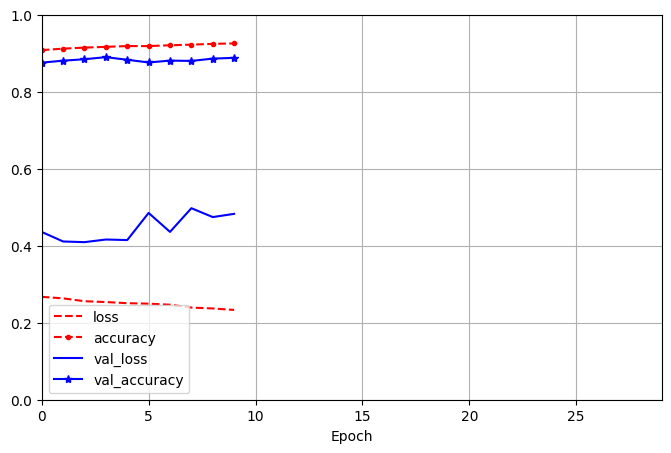

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5139 - accuracy: 0.8836


[0.513940691947937, 0.8835999965667725]